In [1]:
import torch
import joblib
import pandas as pd
import numpy as np
from functions import auroc_curve, evaluation, rm

results = pd.DataFrame(columns=["Model", "AUROC", "Balanced Accuracy", "F1", "Recall", "Precision"])
path_csv = "../../../Thesis_data/processed_data/"
path_model = "../../../Thesis_data/Models/"

In [2]:
X_test = pd.read_csv(path_csv + "ontime_reporting_X_test.csv")
y_test = pd.read_csv(path_csv + "ontime_reporting_y_test.csv")

In [3]:
X_test = rm(X_test)
y_test = np.ravel(y_test)

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%


## Evaluate Logistic Regression tuned imbalanced model

In [4]:
logreg_tuned_imbalance = joblib.load(path_model + "logreg_tuned_imbalance.joblib")
y_pred_logreg_tuned_imbalance = logreg_tuned_imbalance.predict(X_test)
y_pred_prob_logreg_tuned_imbalance = logreg_tuned_imbalance.predict_proba(X_test)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AUROC Score:  0.739
Balanced Accuracy Score:  0.663
F1 Score:  0.473
Recall Score:  0.377
Precision Score:  0.634


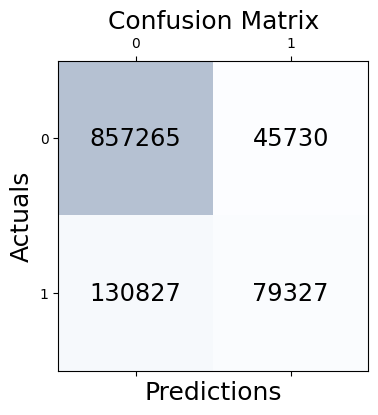

In [5]:
evaluation(y_test, y_pred_logreg_tuned_imbalance, logreg_tuned_imbalance, y_pred_prob_logreg_tuned_imbalance, results)

## Evaluate XGBoost tuned imbalanced model

In [7]:
xgb_class_tuned_imbalance = joblib.load(path_model + "XGBoost_tuned_imbalance.joblib") #xgb version 1.7.5
y_pred_xgb_tuned_imbalance = xgb_class_tuned_imbalance.predict(X_test)
y_pred_prob_xgb_tuned_imbalance = xgb_class_tuned_imbalance.predict_proba(X_test)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [14:22:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:385: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [14:22:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


AUROC Score:  0.822
Balanced Accuracy Score:  0.689
F1 Score:  0.526
Recall Score:  0.416
Precision Score:  0.713


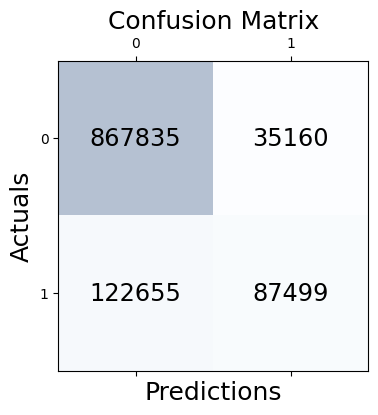

In [8]:
evaluation(y_test, y_pred_xgb_tuned_imbalance, xgb_class_tuned_imbalance, y_pred_prob_xgb_tuned_imbalance, results)

## Evaluate TabNet tuned imbalanced model

In [10]:
tabnet_tuned_imbalance = torch.load(path_model + "TabNet_tuned_imbalance.pt", map_location=torch.device('cpu'))
tabnet_tuned_imbalance.device = "cpu"
y_pred_tabnet_tuned_imbalance = tabnet_tuned_imbalance.predict(X_test.values)
y_pred_prob_tabnet_tuned_imbalance = tabnet_tuned_imbalance.predict_proba(X_test.values)[:, 1]

AUROC Score:  0.76
Balanced Accuracy Score:  0.667
F1 Score:  0.48
Recall Score:  0.384
Precision Score:  0.64


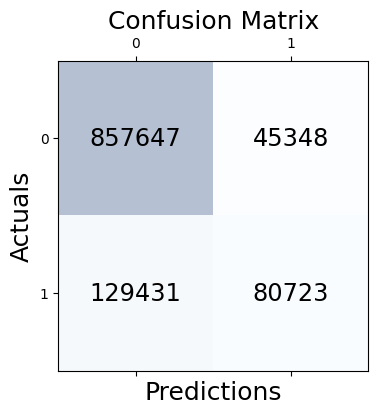

In [11]:
evaluation(y_test, y_pred_tabnet_tuned_imbalance, tabnet_tuned_imbalance, y_pred_prob_tabnet_tuned_imbalance, results)

## Evaluate Random Forests tuned imbalanced model

In [12]:
rf_tuned_imbalanced = joblib.load(path_model + "rf_tuned_imbalanced.joblib")
y_pred_rf_tuned_imbalanced = rf_tuned_imbalanced.predict(X_test)
y_pred_prob_rf_tuned_imbalanced = rf_tuned_imbalanced.predict_proba(X_test)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[Parallel(n_jobs=8)]: Using ba

AUROC Score:  0.798
Balanced Accuracy Score:  0.669
F1 Score:  0.488
Recall Score:  0.378
Precision Score:  0.687


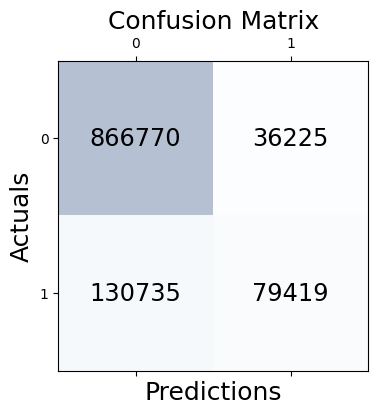

In [13]:
evaluation(y_test, y_pred_rf_tuned_imbalanced, rf_tuned_imbalanced, y_pred_prob_rf_tuned_imbalanced, results)

In [14]:
results.sort_values(by=["AUROC"], ascending=False)

,Model,AUROC,Balanced Accuracy,F1,Recall,Precision
2,XGBClassifier,0.822,0.689,0.526,0.416,0.713
4,RandomForestClassifier,0.798,0.669,0.488,0.378,0.687
3,TabNetClassifier,0.760,0.667,0.480,0.384,0.640
1,LogisticRegression,0.739,0.663,0.473,0.377,0.634


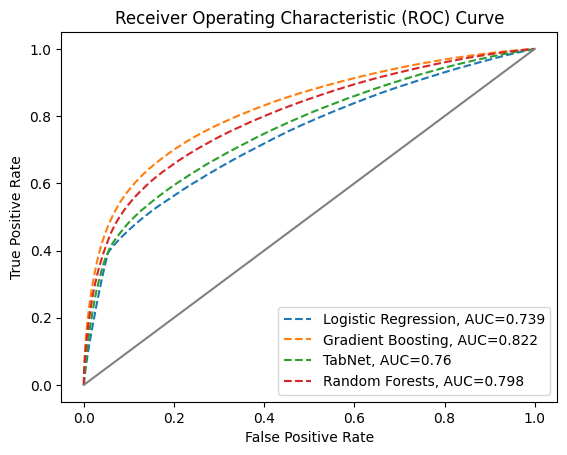

<Figure size 1400x1200 with 0 Axes>

In [15]:
auroc_curve(y_test, y_pred_prob_logreg_tuned_imbalance, y_pred_prob_xgb_tuned_imbalance, y_pred_prob_tabnet_tuned_imbalance, y_pred_prob_rf_tuned_imbalanced)